# Setup

In [1]:
import requests
import pandas as pd

In [2]:
THINKEE_HOST = 'beta.droople.app'
THINKEE_USERNAME = 'hackathon@droople.com'
THINKEE_PASSWORD = 'm7P8Sn&R'
THINKEE_CATEGORY = 'drooplewebapp'
THINKEE_ENVIRONMENT = ''
THINKEE_PROTOCOL = 'https'

# Thinkee login

In [3]:
url = '{}://{}/auth/loginuser'.format(THINKEE_PROTOCOL, THINKEE_HOST)
payload = {'username': THINKEE_USERNAME,
           'password': THINKEE_PASSWORD,
           'category': THINKEE_CATEGORY,
           'environment': THINKEE_ENVIRONMENT
           }
login_res = requests.post(url, json=payload).json()
token = login_res[1]['token']

# Get devices

In [4]:
url = '{}://{}/devices/base/get/devices'.format(THINKEE_PROTOCOL, THINKEE_HOST)
headers = {
    'token': token,
    'environment': THINKEE_ENVIRONMENT,
    'category': THINKEE_CATEGORY
    }
payload = {}

In [5]:
devices_results = requests.post(url, headers=headers, json=payload).json()

In [6]:
list(map(lambda x: x['name'], devices_results))

['01-StMarc-Bar-ColdWater',
 '02-StMarc-Bar-HotWater',
 '03-StMarc-WC1-women',
 '04-StMarc-WC2-women',
 '05-StMarc-WC3-women',
 '06-StMarc-WC4-women',
 '07-StMarc-WC5-women',
 '08-StMarc-WC6-men',
 '09-StMarc-WC7-men',
 '10-StMarc-Faucet1-ColdWater-women',
 '11-StMarc-Faucet1-HotWater-women',
 '12-StMarc-Faucet2-ColdWater-women',
 '13-StMarc-Faucet2-HotWater-women',
 '14-StMarc-Faucet1-ColdWater-men',
 '15-StMarc-Faucet1-HotWater-men',
 'Droople Water Meter 1',
 'Droople Water Meter 2',
 'Droople Water Meter 3',
 'Droople Water Meter 4',
 'Http demo',
 'SPG water meter',
 'Sensing Lab Leak']

In [7]:
# List of devices and their commands
devices_results[1].keys()

dict_keys(['id', 'name', 'key', 'image', 'parameters', 'module', 'model', 'createdAt', 'updatedAt', 'information', 'command', 'module_model', 'device_types', 'device_model'])

In [8]:
print(devices_results[0]['name'])
devices_results[0]['command'][1]

01-StMarc-Bar-ColdWater


{'id': 1389,
 'name': 'Flow Quantity',
 'cmdclass': 'Display',
 'key': 'flowQuantity',
 'cmddisplay': 'display',
 'cmdhist': 'scatter',
 'prd': 0,
 'act': False,
 'parameters': {},
 'dttp': 'volumeL',
 'module': 'ttn',
 'ret': 'default',
 'createdAt': '2019-11-14T08:29:40.933Z',
 'updatedAt': '2019-11-14T08:29:40.933Z',
 'deviceId': 446,
 'modelId': 596,
 'position': 2}

# Get data

In [9]:
# select a command id from the results of above query
cmdId = devices_results[0]['command'][1]['id']
data_range = '12.month'
url = '{}://{}/devices/base/command/get/history'.format(THINKEE_PROTOCOL, THINKEE_HOST)
headers = {
    'token': token,
    'environment': THINKEE_ENVIRONMENT,
    'category': THINKEE_CATEGORY
}
payload= {'cmdId': cmdId, 'range': data_range}
cmd_data = requests.post(url, headers=headers, json=payload).json()


In [10]:
cmd_data.keys()

dict_keys(['id', 'name', 'key', 'parameters', 'datatype', 'device', 'measurement'])

 # Plot data

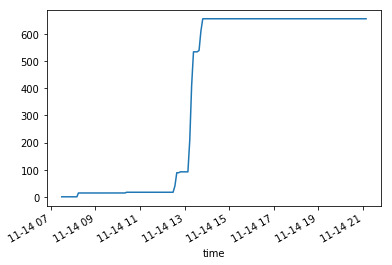

In [14]:
df = pd.DataFrame(cmd_data['measurement'])
df.columns
df['value'] = df['value'].apply(lambda x: x['value'])
df.time = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')
df.set_index(['time'],inplace=True)
df = df.sort_index()
# start_date = '2019-06-01'
# end_date = '2019-09-01'
# raw data plot
# df[(df.index > start_date) & (df.index < end_date)]['value'].plot()
df['value'].plot()

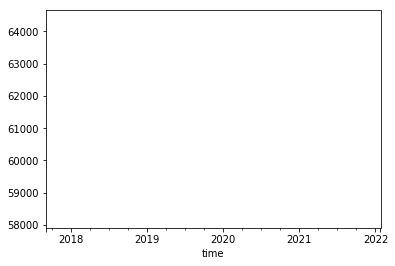

In [12]:
# daily aggregate plot
# df[(df.index > start_date) & (df.index < end_date)].resample('D').sum()['value'].plot()
df.resample('D').sum()['value'].plot()

In [13]:
df.head()

units                           val_id  value
time                                                             
2019-11-14 07:29:00     l  ttn/:52-37-88-0f/:/flowQuantity    0.0
2019-11-14 07:34:00     l  ttn/:52-37-88-0f/:/flowQuantity    0.0
2019-11-14 07:39:00     l  ttn/:52-37-88-0f/:/flowQuantity    0.0
2019-11-14 07:44:00     l  ttn/:52-37-88-0f/:/flowQuantity    0.0
2019-11-14 07:49:00     l  ttn/:52-37-88-0f/:/flowQuantity    0.0